<a href="https://colab.research.google.com/github/pisceno/AI-Generative/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DBSCAN (Density-Based Spatial Clustering) ###

Número de Clusters detectados: 2
Número de Puntos clasificados como Ruido (-1): 2


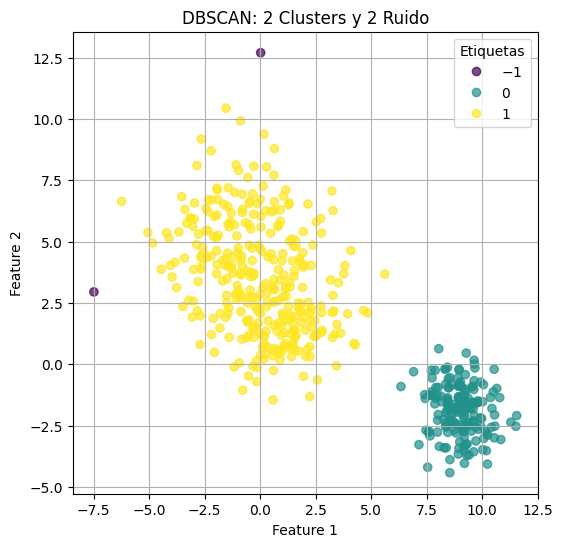

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

print("### DBSCAN (Density-Based Spatial Clustering) ###")

# 1. Generación del Dataset Sintético (Reutilizando los mismos datos)
X, y_true = make_blobs(n_samples=500, centers=[[-1, 5], [1, 2], [9, -2]],
                       cluster_std=[2.0, 1.5, 1.0], random_state=42)
feature_names = ["Feature 1", "Feature 2"]

# 2. Escalamiento (Normalización Estándar)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Entrenamiento del Modelo DBSCAN
# Parámetros calibrados para el dataset escalado
model_dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = model_dbscan.fit_predict(X_scaled)

# 4. Análisis de Resultados (Detección de Clusters y Ruido)
n_clusters_ = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_ = list(labels_dbscan).count(-1)

print(f"\nNúmero de Clusters detectados: {n_clusters_}")
print(f"Número de Puntos clasificados como Ruido (-1): {n_noise_}")

# 5. Visualización
plt.figure(figsize=(6, 6))
# Se utiliza X (datos originales) para que los ejes del gráfico sean legibles
scatter = plt.scatter(X[:, 0], X[:, 1],
                      c=labels_dbscan, cmap='viridis', alpha=0.7)

plt.title(f'DBSCAN: {n_clusters_} Clusters y {n_noise_} Ruido')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
# La leyenda mostrará el ruido como una categoría separada (Etiqueta -1)
plt.legend(*scatter.legend_elements(), title="Etiquetas")
plt.grid(True)
plt.show()